In [2]:
%matplotlib inline 

import glob 
import os 

import numpy as np
import pysam
import seaborn as sns
from matplotlib import gridspec
import matplotlib


from gscripts.general import dataviz
import pandas as pd
from gscripts import qtools
import itertools
img_dir = "."

# Prototype Downsampling Analysis

In [ ]:
!downsample_bam.py '--bam' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/RBFOX2-204-CLIP_S1_R1.A01_204_01_RBFOX2.adapterTrim.round2.rmRep.bam'  '--bam01' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.01.bam'  '--bam02' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.02.bam'  '--bam03' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.03.bam'  '--bam04' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.04.bam'  '--bam05' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.05.bam'  '--bam06' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.06.bam'  '--bam07' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.07.bam'  '--bam08' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.08.bam'  '--bam09' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.09.bam'  

In [ ]:
!barcode_collapse_pe.py -b /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.01.bam -o /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.01.rmDup.bam -m /projects/ps-yeolab3/encode/analysis/ad-hoc/foo.01.metrics
!barcode_collapse_pe.py -b /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.02.bam -o /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.02.rmDup.bam -m /projects/ps-yeolab3/encode/analysis/ad-hoc/foo.02.metrics
!barcode_collapse_pe.py -b /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.03.bam -o /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.03.rmDup.bam -m /projects/ps-yeolab3/encode/analysis/ad-hoc/foo.03.metrics
!barcode_collapse_pe.py -b /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.04.bam -o /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.04.rmDup.bam -m /projects/ps-yeolab3/encode/analysis/ad-hoc/foo.04.metrics
!barcode_collapse_pe.py -b /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.05.bam -o /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.05.rmDup.bam -m /projects/ps-yeolab3/encode/analysis/ad-hoc/foo.05.metrics
!barcode_collapse_pe.py -b /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.06.bam -o /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.06.rmDup.bam -m /projects/ps-yeolab3/encode/analysis/ad-hoc/foo.06.metrics
!barcode_collapse_pe.py -b /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.07.bam -o /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.07.rmDup.bam -m /projects/ps-yeolab3/encode/analysis/ad-hoc/foo.07.metrics
!barcode_collapse_pe.py -b /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.08.bam -o /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.08.rmDup.bam -m /projects/ps-yeolab3/encode/analysis/ad-hoc/foo.08.metrics
!barcode_collapse_pe.py -b /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.09.bam -o /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/204_01_RBFOX2.merged.r2.09.rmDup.bam -m /projects/ps-yeolab3/encode/analysis/ad-hoc/foo.09.metrics

In [ ]:
#this won't quite work, copy and pate to /projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation
!for x in *.rmDup.bam; do samtools sort $x ${x%.*}.sorted; done
!for x in *.sorted.bam; do samtools index $x; done

In [3]:
total_reads = "/projects/ps-yeolab3/encode/analysis/encode_master/RBFOX2-204-CLIP_S1_R1.A01_204_01_RBFOX2.adapterTrim.round2.rmRep.rmDup.sorted.bam"

In [4]:
rmDup_files = sorted(glob.glob("/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/*rmDup.sorted.bam"))
rmDup_files.append(total_reads)
all_files = sorted(glob.glob("/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/*.sorted.bam"))
dup_files = [fn for fn in all_files if fn not in rmDup_files]

In [5]:
rmDup_counts = np.array([pysam.Samfile(fn).mapped for fn in rmDup_files]) * 1.0
dup_counts    = np.array([pysam.Samfile(fn).mapped for fn in dup_files]) * 1.0

fraction_usable = rmDup_counts / dup_counts

fraction_recovered = (rmDup_counts[1:] - rmDup_counts[:-1]) / (dup_counts[1:] - dup_counts[:-1])

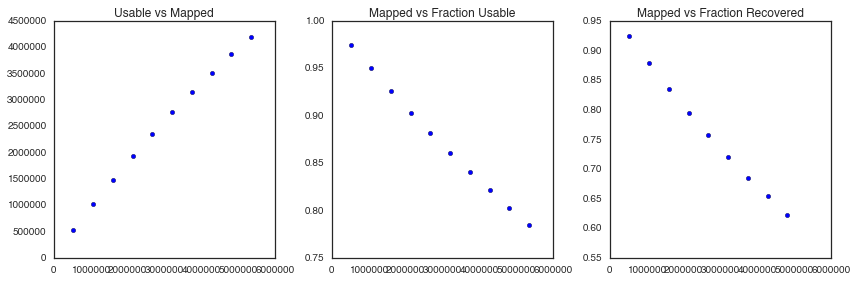

In [6]:
num_rows = 1
num_cols = 3

with dataviz.Figure(os.path.join(img_dir, "foo.svg"), figsize=(4 * num_cols, 4*num_rows)) as fig:
    ax = fig.add_subplot(num_rows, num_cols,1)
    ax.scatter(dup_counts, rmDup_counts)
    ax.set_title("Usable vs Mapped")
    
    ax = fig.add_subplot(num_rows, num_cols,2)
    ax.scatter(dup_counts, fraction_usable)
    ax.set_title("Mapped vs Fraction Usable")
    
    ax = fig.add_subplot(num_rows, num_cols,3)
    ax.scatter(dup_counts[:-1], fraction_recovered)
    ax.set_title("Mapped vs Fraction Recovered")

Panel 1) Raw mapped reads vs sequenced reads
Panel 2) Mapped reads vs Fraction Usable, showing there is a marginal loss of sequencing efficency
Panel 3) Mapped vs fraction recovered, an invariant metric that calculates the utuility of adding x more reads to the sequencing dataset.

I should I plot this against total reads?  What we really want is a metric based off the full sequecing library, not an intermedate step.  Also, we want a metric of how much more to sequence, an intermeate metric is bullshit for that.  

I'll need to make a qscript for that, too many steps to process at once.  
Real question: What is % of reads I recover, out of total when I add more reads

I don't need a fraction usable metric, I need a fraction recovered metric



# Prototype fastq demuxing

In [ ]:
downsample_fastq.py   '--fastq' '/home/gpratt/ad-hoc/RBFOX2-204-CLIP_S1_R1.A01_204_01_RBFOX2.fastq.gz'  '--fq01' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/RBFOX2-204-CLIP_S1_R1.A01_204_01_RBFOX2.01.fastq.gz' '--fq02' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/RBFOX2-204-CLIP_S1_R1.A01_204_01_RBFOX2.02.fastq.gz'  '--fq03' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/RBFOX2-204-CLIP_S1_R1.A01_204_01_RBFOX2.03.fastq.gz' '--fq04' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/RBFOX2-204-CLIP_S1_R1.A01_204_01_RBFOX2.04.fastq.gz'  '--fq05' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/RBFOX2-204-CLIP_S1_R1.A01_204_01_RBFOX2.05.fastq.gz' '--fq06' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/RBFOX2-204-CLIP_S1_R1.A01_204_01_RBFOX2.06.fastq.gz' '--fq07' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/RBFOX2-204-CLIP_S1_R1.A01_204_01_RBFOX2.07.fastq.gz'  '--fq08' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/RBFOX2-204-CLIP_S1_R1.A01_204_01_RBFOX2.08.fastq.gz'  '--fq09' '/projects/ps-yeolab3/encode/analysis/ad-hoc/read_saturation/RBFOX2-204-CLIP_S1_R1.A01_204_01_RBFOX2.09.fastq.gz'  

# Use Erics rmduped files

In [ ]:
cut -f 1-21 406_CLIP_GAGATTCC-ATAGAGGC_L003_R1.A03_406_01_PABPC4.adapterTrim.round2.fastq.mapped_vs_MASTER_filelist.wrepbaseandtRNA.fa.fixed.fa.UpdatedSimpleRepeat.sam.combined_w_uniquemap.prermDup.sam | head

In [ ]:
python ~/gscripts/gscripts/clipseq/fix_sam_file.py --sam 406_CLIP_GAGATTCC-ATAGAGGC_L003_R1.A03_406_01_PABPC4.adapterTrim.round2.fastq.mapped_vs_MASTER_filelist.wrepbaseandtRNA.fa.fixed.fa.UpdatedSimpleRepeat.sam.combined_w_uniquemap.prermDup.sam | samtools view -bS - > ~/projects/idr/analysis/ad-hoc/foo.bam

In [1]:
!barcode_collapse_pe.py -b ~/projects/idr/analysis/ad-hoc/foo.bam -o ~/projects/idr/analysis/ad-hoc/foo.rmdup.bam -m /projects/ps-yeolab3/encode/analysis/ad-hoc/foo.01.metrics